# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities was used and built upon to create analyses of the relationships between latitude and weather data points.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | kutum
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | verkhnevilyuysk
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | kill devil hills
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | turbat
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | port-gentil
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | wang nam yen
Processing Record 21 of Set 1 | portland
Processing Record 22 

Processing Record 42 of Set 4 | charcas
Processing Record 43 of Set 4 | fortuna
Processing Record 44 of Set 4 | ciudad camilo cienfuegos
City not found. Skipping...
Processing Record 45 of Set 4 | kapa'a
Processing Record 46 of Set 4 | motueka
Processing Record 47 of Set 4 | correntina
Processing Record 48 of Set 4 | petropavlovsk-kamchatsky
Processing Record 49 of Set 4 | mazatlan
Processing Record 0 of Set 5 | qaisumah
Processing Record 1 of Set 5 | rapid city
Processing Record 2 of Set 5 | fale old settlement
Processing Record 3 of Set 5 | gazojak
Processing Record 4 of Set 5 | sinabang
Processing Record 5 of Set 5 | drabiv
Processing Record 6 of Set 5 | luderitz
Processing Record 7 of Set 5 | karratha
Processing Record 8 of Set 5 | zilair
Processing Record 9 of Set 5 | enewetak
Processing Record 10 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 11 of Set 5 | walvis bay
Processing Record 12 of Set 5 | sihanoukville
Processing Record 13 of Set 5 | lorengau

Processing Record 32 of Set 8 | talcahuano
Processing Record 33 of Set 8 | el calafate
Processing Record 34 of Set 8 | keila
Processing Record 35 of Set 8 | fisterra
Processing Record 36 of Set 8 | mahajanga
Processing Record 37 of Set 8 | saipan
Processing Record 38 of Set 8 | aljezur
Processing Record 39 of Set 8 | bukama
Processing Record 40 of Set 8 | juneau
Processing Record 41 of Set 8 | nema
Processing Record 42 of Set 8 | rawson
Processing Record 43 of Set 8 | tromso
Processing Record 44 of Set 8 | port pirie
Processing Record 45 of Set 8 | milove
Processing Record 46 of Set 8 | waingapu
Processing Record 47 of Set 8 | anchorage
Processing Record 48 of Set 8 | ola
Processing Record 49 of Set 8 | buckie
Processing Record 0 of Set 9 | lubang
Processing Record 1 of Set 9 | ouani
Processing Record 2 of Set 9 | elverum
Processing Record 3 of Set 9 | hiratacho
Processing Record 4 of Set 9 | kupang
Processing Record 5 of Set 9 | island harbour
Processing Record 6 of Set 9 | arteche
Pr

Processing Record 23 of Set 12 | skeldon
Processing Record 24 of Set 12 | oyem
Processing Record 25 of Set 12 | papao
Processing Record 26 of Set 12 | san jose village
City not found. Skipping...
Processing Record 27 of Set 12 | byumba
Processing Record 28 of Set 12 | port macquarie
Processing Record 29 of Set 12 | tengrela
Processing Record 30 of Set 12 | ciudad lazaro cardenas
Processing Record 31 of Set 12 | panshi
Processing Record 32 of Set 12 | sibiti
Processing Record 33 of Set 12 | cholpon-ata
Processing Record 34 of Set 12 | walla walla
Processing Record 35 of Set 12 | tabuk
Processing Record 36 of Set 12 | sur
Processing Record 37 of Set 12 | shahr-e babak
Processing Record 38 of Set 12 | encs
Processing Record 39 of Set 12 | rio gallegos
Processing Record 40 of Set 12 | lerwick
Processing Record 41 of Set 12 | ulanhot
Processing Record 42 of Set 12 | lodwar
Processing Record 43 of Set 12 | luena
Processing Record 44 of Set 12 | llazice
Processing Record 45 of Set 12 | barabo

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,-1.79,88,84,4.65,GL,1683501516
1,kutum,14.2000,24.6667,25.30,14,54,3.42,SD,1683501516
2,puerto natales,-51.7236,-72.4875,6.29,86,72,1.85,CL,1683501428
3,papatowai,-46.5619,169.4708,15.35,66,100,0.51,NZ,1683501052
4,anadyr,64.7500,177.4833,-0.72,86,40,9.00,RU,1683501516


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-1.79,88,84,4.65,GL,1683501516
1,kutum,14.2000,24.6667,25.30,14,54,3.42,SD,1683501516
2,puerto natales,-51.7236,-72.4875,6.29,86,72,1.85,CL,1683501428
3,papatowai,-46.5619,169.4708,15.35,66,100,0.51,NZ,1683501052
4,anadyr,64.7500,177.4833,-0.72,86,40,9.00,RU,1683501516


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

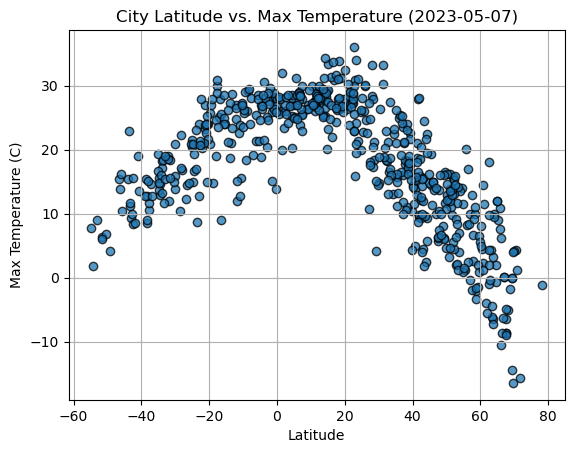

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=.75, edgecolors='black')

# Get the date for the Titles as in the examples
unix_time = city_data_df.iloc[1,8]
convert_date = datetime.datetime.fromtimestamp(unix_time)
date_string = convert_date.strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ({date_string})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

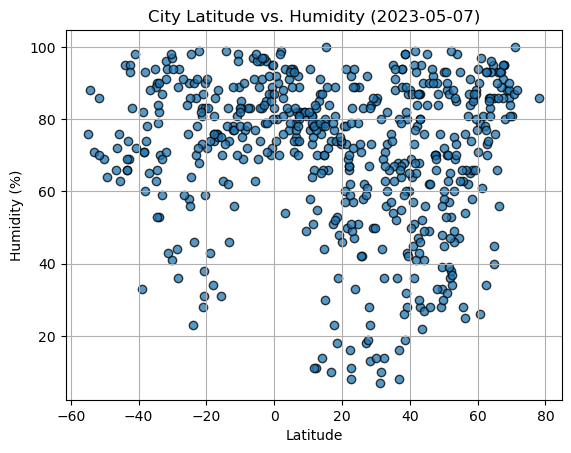

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({date_string})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

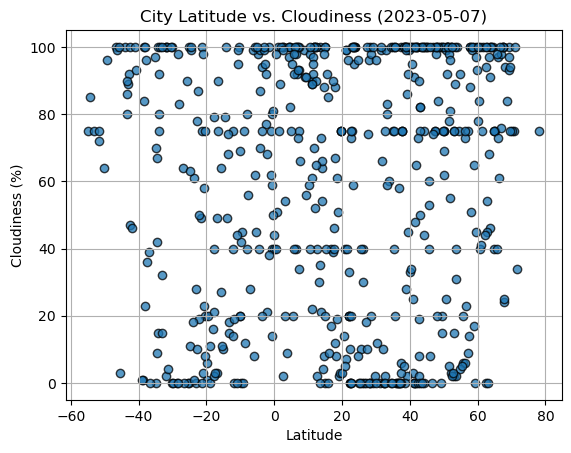

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date_string})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

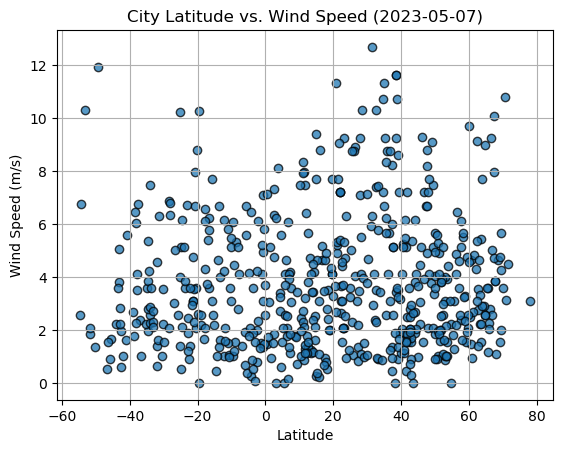

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date_string})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_vals, y_vals):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    regress_yvals = x_vals * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_vals, y_vals, alpha=.75)
    plt.plot(x_vals, regress_yvals, "r-")
    #plt.annotate(line_eq, (5.8,0.8), fontsize=15, color="red")
    return slope, intercept, rvalue

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-1.79,88,84,4.65,GL,1683501516
1,kutum,14.2000,24.6667,25.30,14,54,3.42,SD,1683501516
4,anadyr,64.7500,177.4833,-0.72,86,40,9.00,RU,1683501516
6,iqaluit,63.7506,-68.5145,-6.44,83,46,5.43,CA,1683501053
7,isafjordur,66.0755,-23.1240,6.27,93,97,2.25,IS,1683501047


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,6.29,86,72,1.85,CL,1683501428
3,papatowai,-46.5619,169.4708,15.35,66,100,0.51,NZ,1683501052
5,port-aux-francais,-49.3500,70.2167,4.09,64,96,11.93,TF,1683501049
13,atafu village,-8.5421,-172.5159,29.13,77,12,5.33,TK,1683501517
16,port-gentil,-0.7193,8.7815,27.98,89,40,3.09,GA,1683501517


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8586331002669665


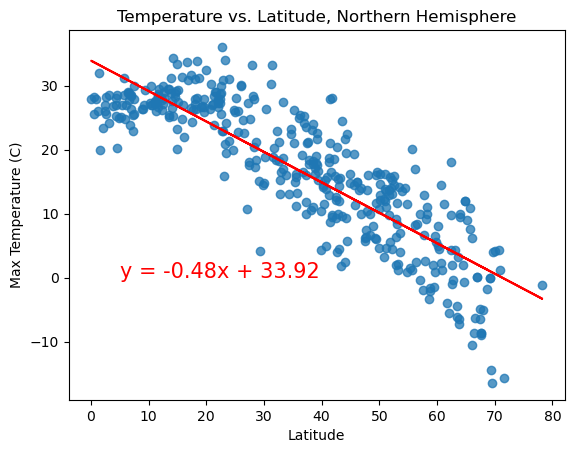

In [81]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value = plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Temperature vs. Latitude, Northern Hemisphere")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (5,0), fontsize=15, color="red")
print(f"The r-value is: {r_value}")
plt.show()

The r-value is: 0.7639966545938836


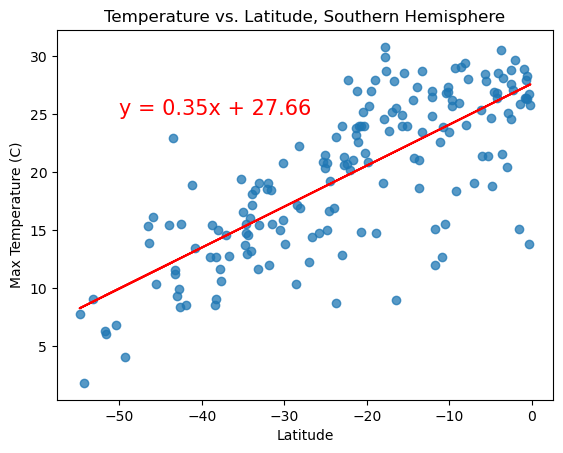

In [82]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value = plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Temperature vs. Latitude, Southern Hemisphere")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-50,25), fontsize=15, color="red")
print(f"The r-value is: {r_value}")
plt.show()

**Discussion about the linear relationship:** 

In both hemispheres the maximum temperature rises as the Latitudes approach zero, or the equator. The absolute value of the r-values for both regressions is above .7, indicating a strong correlation. Specifically, in the northern hemisphere there is a strong negative correlation between Latitude and max temperature (r-value is -.86), whereas in the southern hemisphere there is a strong positive correlation between Latitude and max temperature(r-value is .76). IE: it is generally warmer near the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.035117627320408545


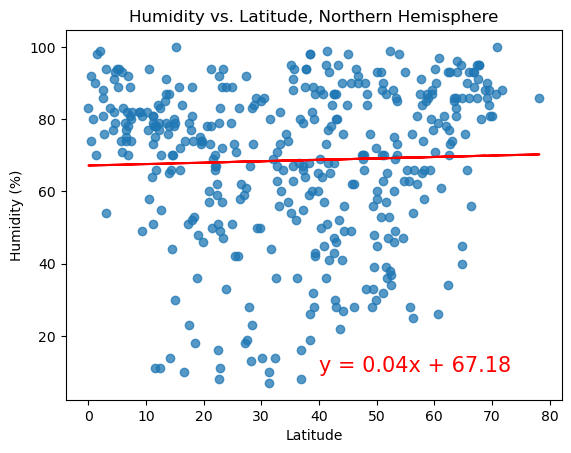

In [79]:
# Northern Hemisphere
slope, intercept, r_value = plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude, Northern Hemisphere")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
print(f"The r-value is: {r_value}")
plt.show()

The r-value is: 0.17526777855029727


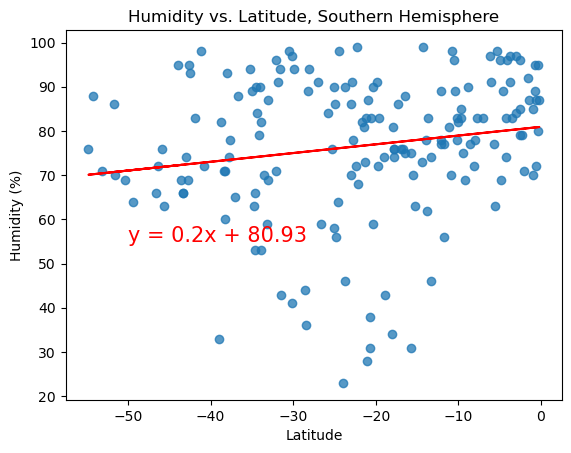

In [80]:
# Southern Hemisphere
slope, intercept, r_value = plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude, Southern Hemisphere")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-50,55), fontsize=15, color="red")
print(f"The r-value is: {r_value}")
plt.show()

**Discussion about the linear relationship:** 

The low r value and slope of the linear regressions for both hemispheres indicate that there is no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06563366274716602


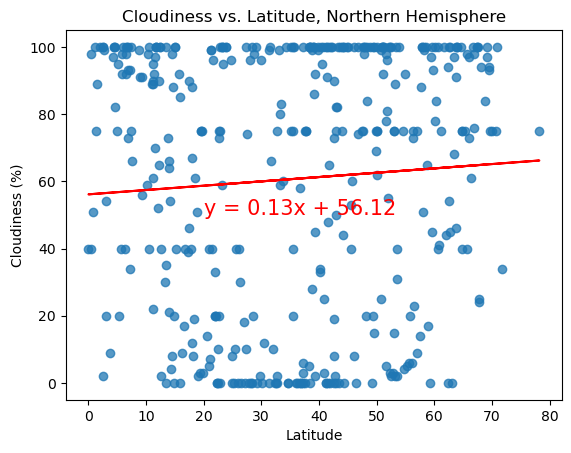

In [83]:
# Northern Hemisphere
slope, intercept, r_value = plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude, Northern Hemisphere")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (20,50), fontsize=15, color="red")
print(f"The r-value is: {r_value}")
plt.show()

The r-value is: -0.11104785794945353


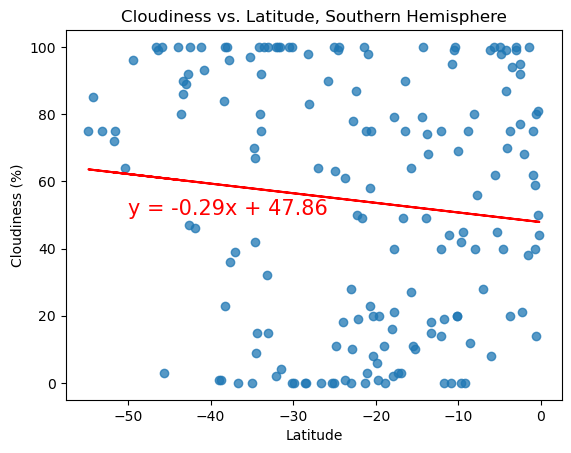

In [84]:
# Southern Hemisphere
slope, intercept, r_value = plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude, Southern Hemisphere")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-50,50), fontsize=15, color="red")
print(f"The r-value is: {r_value}")
plt.show()

**Discussion about the linear relationship:** 

The low r value and slope of the linear regressions for both hemispheres indicate that there is no correlation between latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03947135928860014


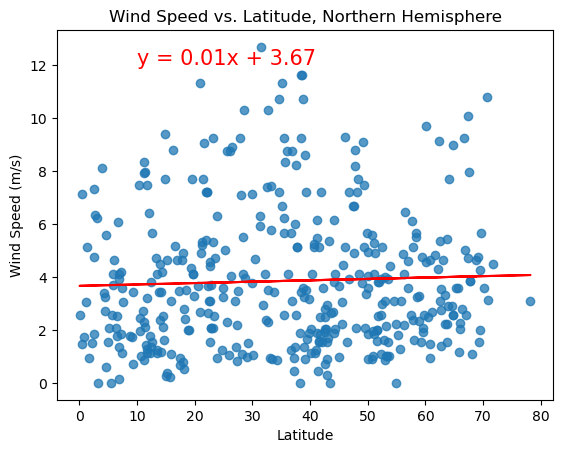

In [87]:
# Northern Hemisphere
slope, intercept, r_value = plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs. Latitude, Northern Hemisphere")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (10,12), fontsize=15, color="red")
print(f"The r-value is: {r_value}")
plt.show()

The r-value is: -0.057505616892166406


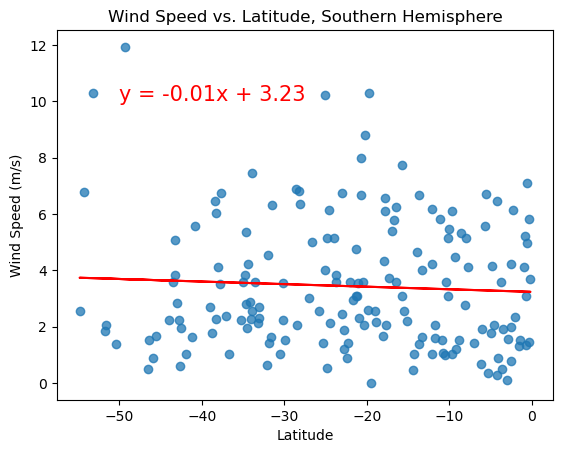

In [89]:
# Southern Hemisphere
slope, intercept, r_value = plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs. Latitude, Southern Hemisphere")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-50,10), fontsize=15, color="red")
print(f"The r-value is: {r_value}")
plt.show()

**Discussion about the linear relationship:** 

The r values are essentialy 0 for both hemispheres indicate that there is no correlation between latitude and Wind Speed.

The only pair of factors studied for which there is a statistical correlation is that of temperature and latitude. If you like it warm move closer to the equator. If you like it cooler, head towards the poles! 